In [10]:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

SEQN - Порядковый номер респондента

age_group - Возрастная группа респондента (старший/нестарший)

RIDAGEYR- Возраст респондента

RIAGENDR- Пол респондента

PAQ605- Если респондент занимается спортом средней или высокой интенсивности, фитнесом или развлекательными мероприятиями в течение типичной недели

BMXBMI -Индекс массы тела респондента

LBXGLU-Уровень глюкозы в крови респондента после голодания

DIQ010-Если респондент болен диабетом

LBXGLT-Устные показания ответчика

LBXIN-Уровень инсулина в крови респондента


In [11]:
dataset = pd.read_csv('/content/drive/MyDrive/data/NHANES_age_prediction.csv')
dataset.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [12]:
dataset.head()


,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [13]:
vals=dataset['age_group'].unique()
vals

array(['Adult', 'Senior'], dtype=object)

In [14]:
dataset2 = dataset.drop(['age_group'], axis=1)
dataset2 = dataset2.drop(['SEQN'], axis=1)
dataset2.head()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [15]:
X = dataset2
y = dataset["age_group"].replace(vals, [0, 1])
yvals = dataset["age_group"]

<ipython-input-15-4cf37c461038>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dataset["age_group"].replace(vals, [0, 1])


In [16]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

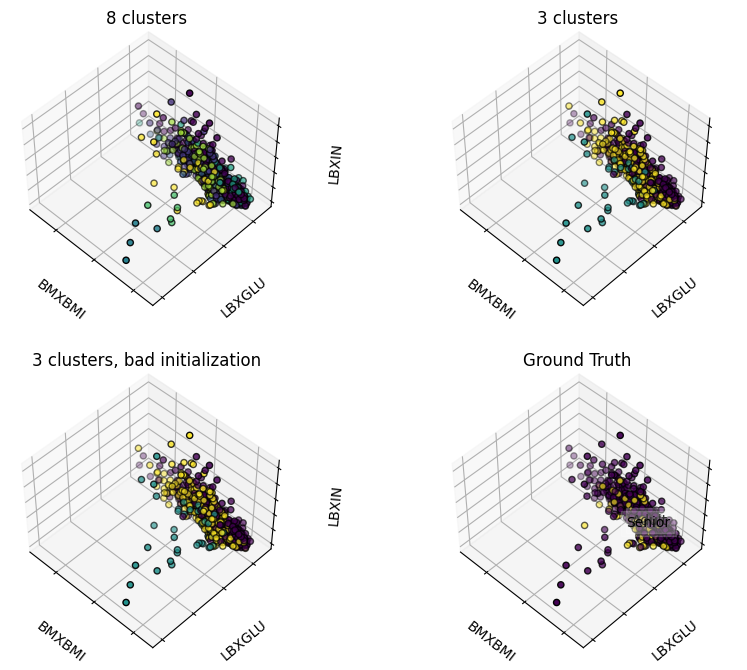

In [18]:
estimators = [
    ("k_means_8", KMeans(n_clusters=8)),
    ("k_means_3", KMeans(n_clusters=3)),
    ("k_means_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
#SEQN		RIDAGEYR	RIAGENDR	PAQ605	BMXBMI	LBXGLU	DIQ010	LBXGLT	LBXIN
    ax.scatter(X["BMXBMI"], X["LBXGLU"], X["LBXIN"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("BMXBMI")
    ax.set_ylabel("LBXGLU")
    ax.set_zlabel("LBXIN")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset[dataset["age_group"]==name]
    ax.text3D(
        ds["BMXBMI"].mean(),
        ds["LBXGLU"].mean(),
        ds["LBXIN"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["BMXBMI"], X["LBXGLU"], X["LBXIN"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("BMXBMI")
ax.set_ylabel("LBXGLU")
ax.set_zlabel("LBXIN")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [19]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [20]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [21]:
best_metric

[2,
 0.5375691144987667,
 0.21294048914726285,
 array([[ 38.90372671,   1.51190476,   1.8136646 ,  27.43069358,
          96.35093168,   2.01242236, 100.29089027,  11.03116977],
        [ 57.94508671,   1.50867052,   1.87283237,  30.88381503,
         117.43352601,   2.03757225, 196.99421965,  16.32208092]])]

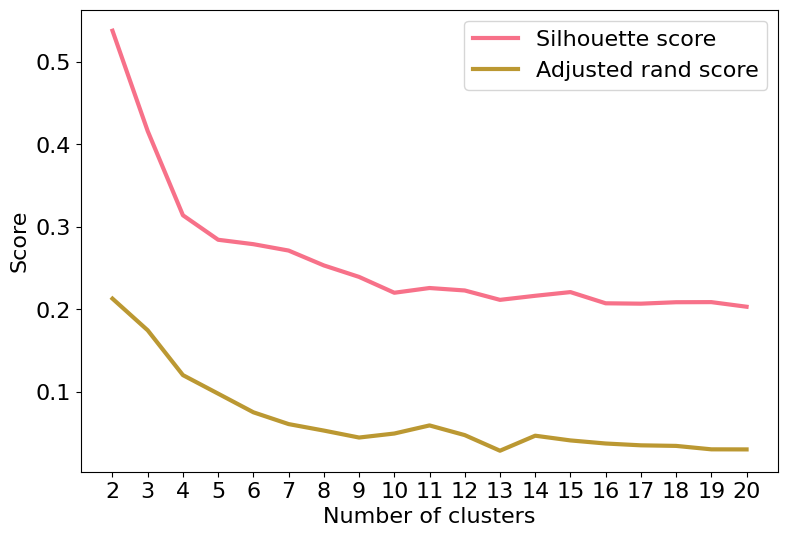

In [22]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram

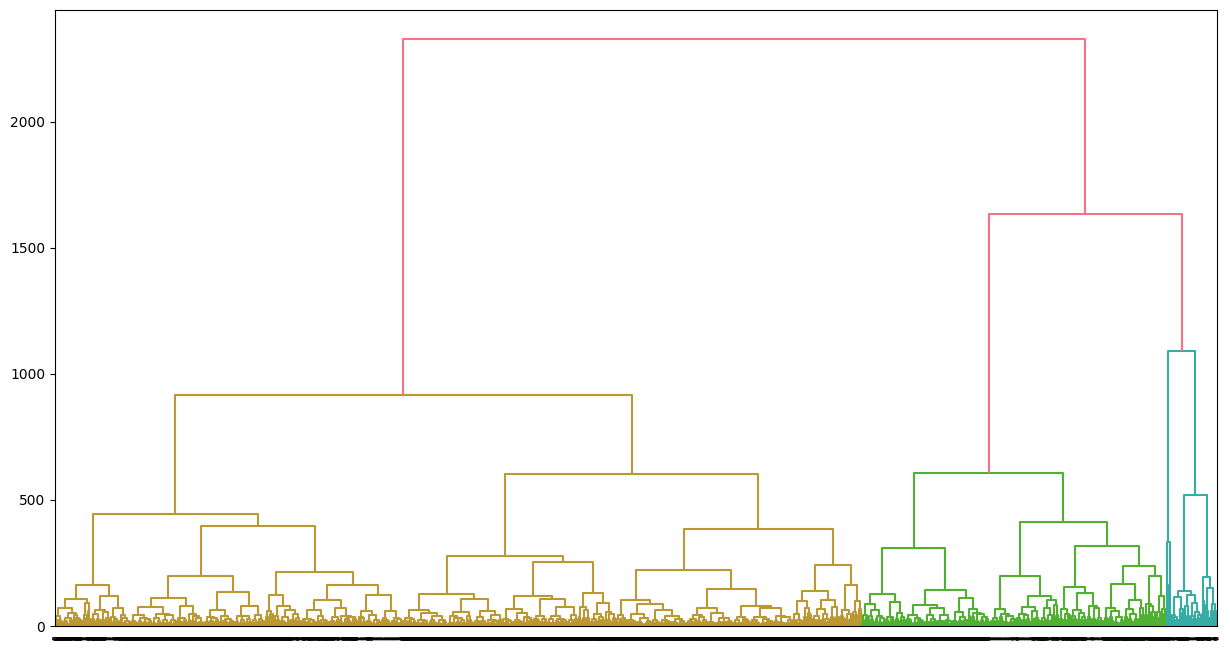

In [24]:
samples = dataset2.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами


plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [25]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [26]:
mins = X.shape[1]

['y', 'b', 'g', 'r']


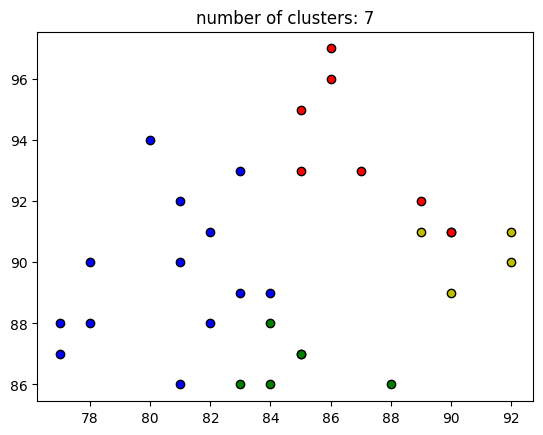

In [84]:
db = DBSCAN(eps=4, min_samples=5).fit(X) #5 b 7
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result
#SEQN		RIDAGEYR	RIAGENDR	PAQ605	BMXBMI	LBXGLU	DIQ010	LBXGLT	LBXIN
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["LBXGLT"], xy["LBXGLU"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["LBXGLT"], xy["LBXGLU"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

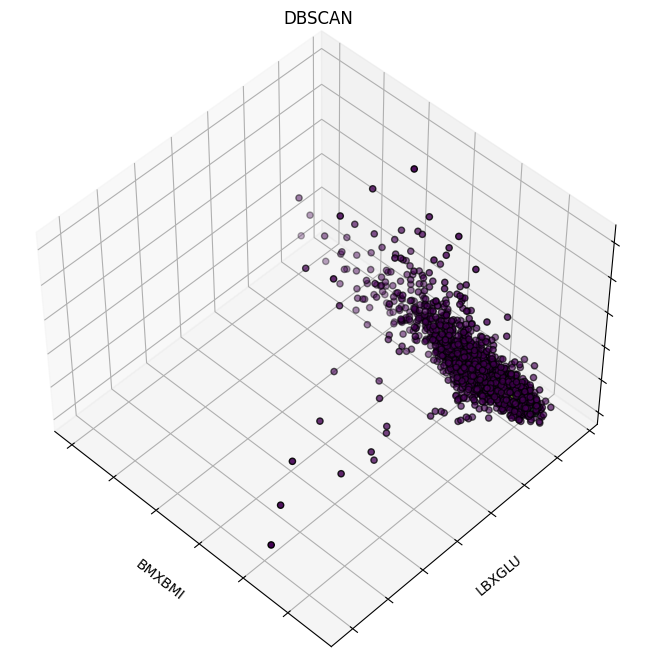

In [85]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)
#SEQN		RIDAGEYR	RIAGENDR	PAQ605	BMXBMI	LBXGLU	DIQ010	LBXGLT	LBXIN
ax.scatter(X["BMXBMI"], X["LBXGLU"], X["LBXIN"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("BMXBMI")
ax.set_ylabel("LBXGLU")
ax.set_zlabel("LBXIN")
ax.set_title("DBSCAN")

plt.show()

In [86]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.38
Adjusted Rand Index: -0.03


<0.5 плохое восстановление